# flat data cleaning 

#### loading csv

In [6]:
import pandas as pd
import numpy as np

path = r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_liyan\data\surat_uncleaned.csv"

df = pd.read_csv(path)

print(df.head())

                                       property_name areaWithType square_feet  \
0          2 BHK Apartment for Sale in Dindoli Surat  Carpet Area    644 sqft   
1           2 BHK Apartment for Sale in Althan Surat   Super Area   1278 sqft   
2          2 BHK Apartment for Sale in Pal Gam Surat   Super Area   1173 sqft   
3     2 BHK Apartment for Sale in Jahangirabad Surat  Carpet Area    700 sqft   
4  2 BHK Apartment for Sale in Orchid Fantasia, P...   Super Area   1250 sqft   

       transaction            status        floor      furnishing  \
0     New Property  Poss. by Oct '24  5 out of 10     Unfurnished   
1     New Property  Poss. by Jan '26  6 out of 14     Unfurnished   
2           Resale     Ready to Move  5 out of 13  Semi-Furnished   
3     New Property     Ready to Move  6 out of 14     Unfurnished   
4  Orchid Fantasia      New Property  Unfurnished               2   

        facing                                        description  \
0         West  Luxury projec

In [7]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("First 5 rows:\n", df.head())
print("Any missing values?\n", df.isnull().sum())


Shape: (4525, 11)
Columns: ['property_name', 'areaWithType', 'square_feet', 'transaction', 'status', 'floor', 'furnishing', 'facing', 'description', 'price_per_sqft', 'price']
First 5 rows:
                                        property_name areaWithType square_feet  \
0          2 BHK Apartment for Sale in Dindoli Surat  Carpet Area    644 sqft   
1           2 BHK Apartment for Sale in Althan Surat   Super Area   1278 sqft   
2          2 BHK Apartment for Sale in Pal Gam Surat   Super Area   1173 sqft   
3     2 BHK Apartment for Sale in Jahangirabad Surat  Carpet Area    700 sqft   
4  2 BHK Apartment for Sale in Orchid Fantasia, P...   Super Area   1250 sqft   

       transaction            status        floor      furnishing  \
0     New Property  Poss. by Oct '24  5 out of 10     Unfurnished   
1     New Property  Poss. by Jan '26  6 out of 14     Unfurnished   
2           Resale     Ready to Move  5 out of 13  Semi-Furnished   
3     New Property     Ready to Move  6 out of

In [2]:
df.columns

Index(['property_name', 'areaWithType', 'square_feet', 'transaction', 'status',
       'floor', 'furnishing', 'facing', 'description', 'price_per_sqft',
       'price'],
      dtype='object')

### Cleaning and Ecoding 

In [8]:
# Strip whitespace
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Clean and convert 'square_feet'
df['square_feet'] = df['square_feet'].str.replace('sqft', '', regex=False).str.replace(',', '').astype(str)
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')

# Clean and convert 'price'
df['price'] = df['price'].str.replace('₹', '', regex=False).str.replace(',', '').str.lower()
df['price'] = df['price'].str.replace('lac', '*1e5', regex=False).str.replace('crore', '*1e7', regex=False)

# convert strings
df['price'] = df['price'].apply(lambda x: eval(x) if isinstance(x, str) and '*' in x else pd.to_numeric(x, errors='coerce'))

# Clean and convert 'price_per_sqft'
df['price_per_sqft'] = df['price_per_sqft'].str.replace('₹', '', regex=False).str.replace(',', '').str.lower()
df['price_per_sqft'] = df['price_per_sqft'].str.replace('per sqft', '', regex=False)
df['price_per_sqft'] = pd.to_numeric(df['price_per_sqft'], errors='coerce')

# Cleaning other...
for col in ['transaction', 'status', 'furnishing', 'facing']:
    df[col] = df[col].str.lower().str.strip()


import re
def extract_floor(val):
    if pd.isna(val): return np.nan
    match = re.search(r'^(\d+)', str(val))
    return float(match.group(1)) if match else np.nan

df['floor'] = df['floor'].apply(extract_floor)

# Droping rows with missing valus
df.dropna(subset=['price', 'square_feet'], inplace=True)

# resting indesxs
df.reset_index(drop=True, inplace=True)

# printing ou the final resualt
print(df.info())
print(df[['square_feet', 'price', 'price_per_sqft']].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   2734 non-null   object 
 1   areaWithType    2734 non-null   object 
 2   square_feet     2734 non-null   float64
 3   transaction     2673 non-null   object 
 4   status          2734 non-null   object 
 5   floor           2015 non-null   float64
 6   furnishing      2493 non-null   object 
 7   facing          2341 non-null   object 
 8   description     1714 non-null   object 
 9   price_per_sqft  2597 non-null   float64
 10  price           2734 non-null   float64
dtypes: float64(4), object(7)
memory usage: 235.1+ KB
None
        square_feet         price  price_per_sqft
count   2734.000000  2.734000e+03     2597.000000
mean    1162.190929  5.115966e+06     5061.018098
std     1968.788471  2.350255e+06     7274.046562
min        3.000000  1.000000e+05        1.000000

# Plotting 

C:\Users\bbuser\AppData\Local\Temp\ipykernel_15264\2928507587.py:64: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


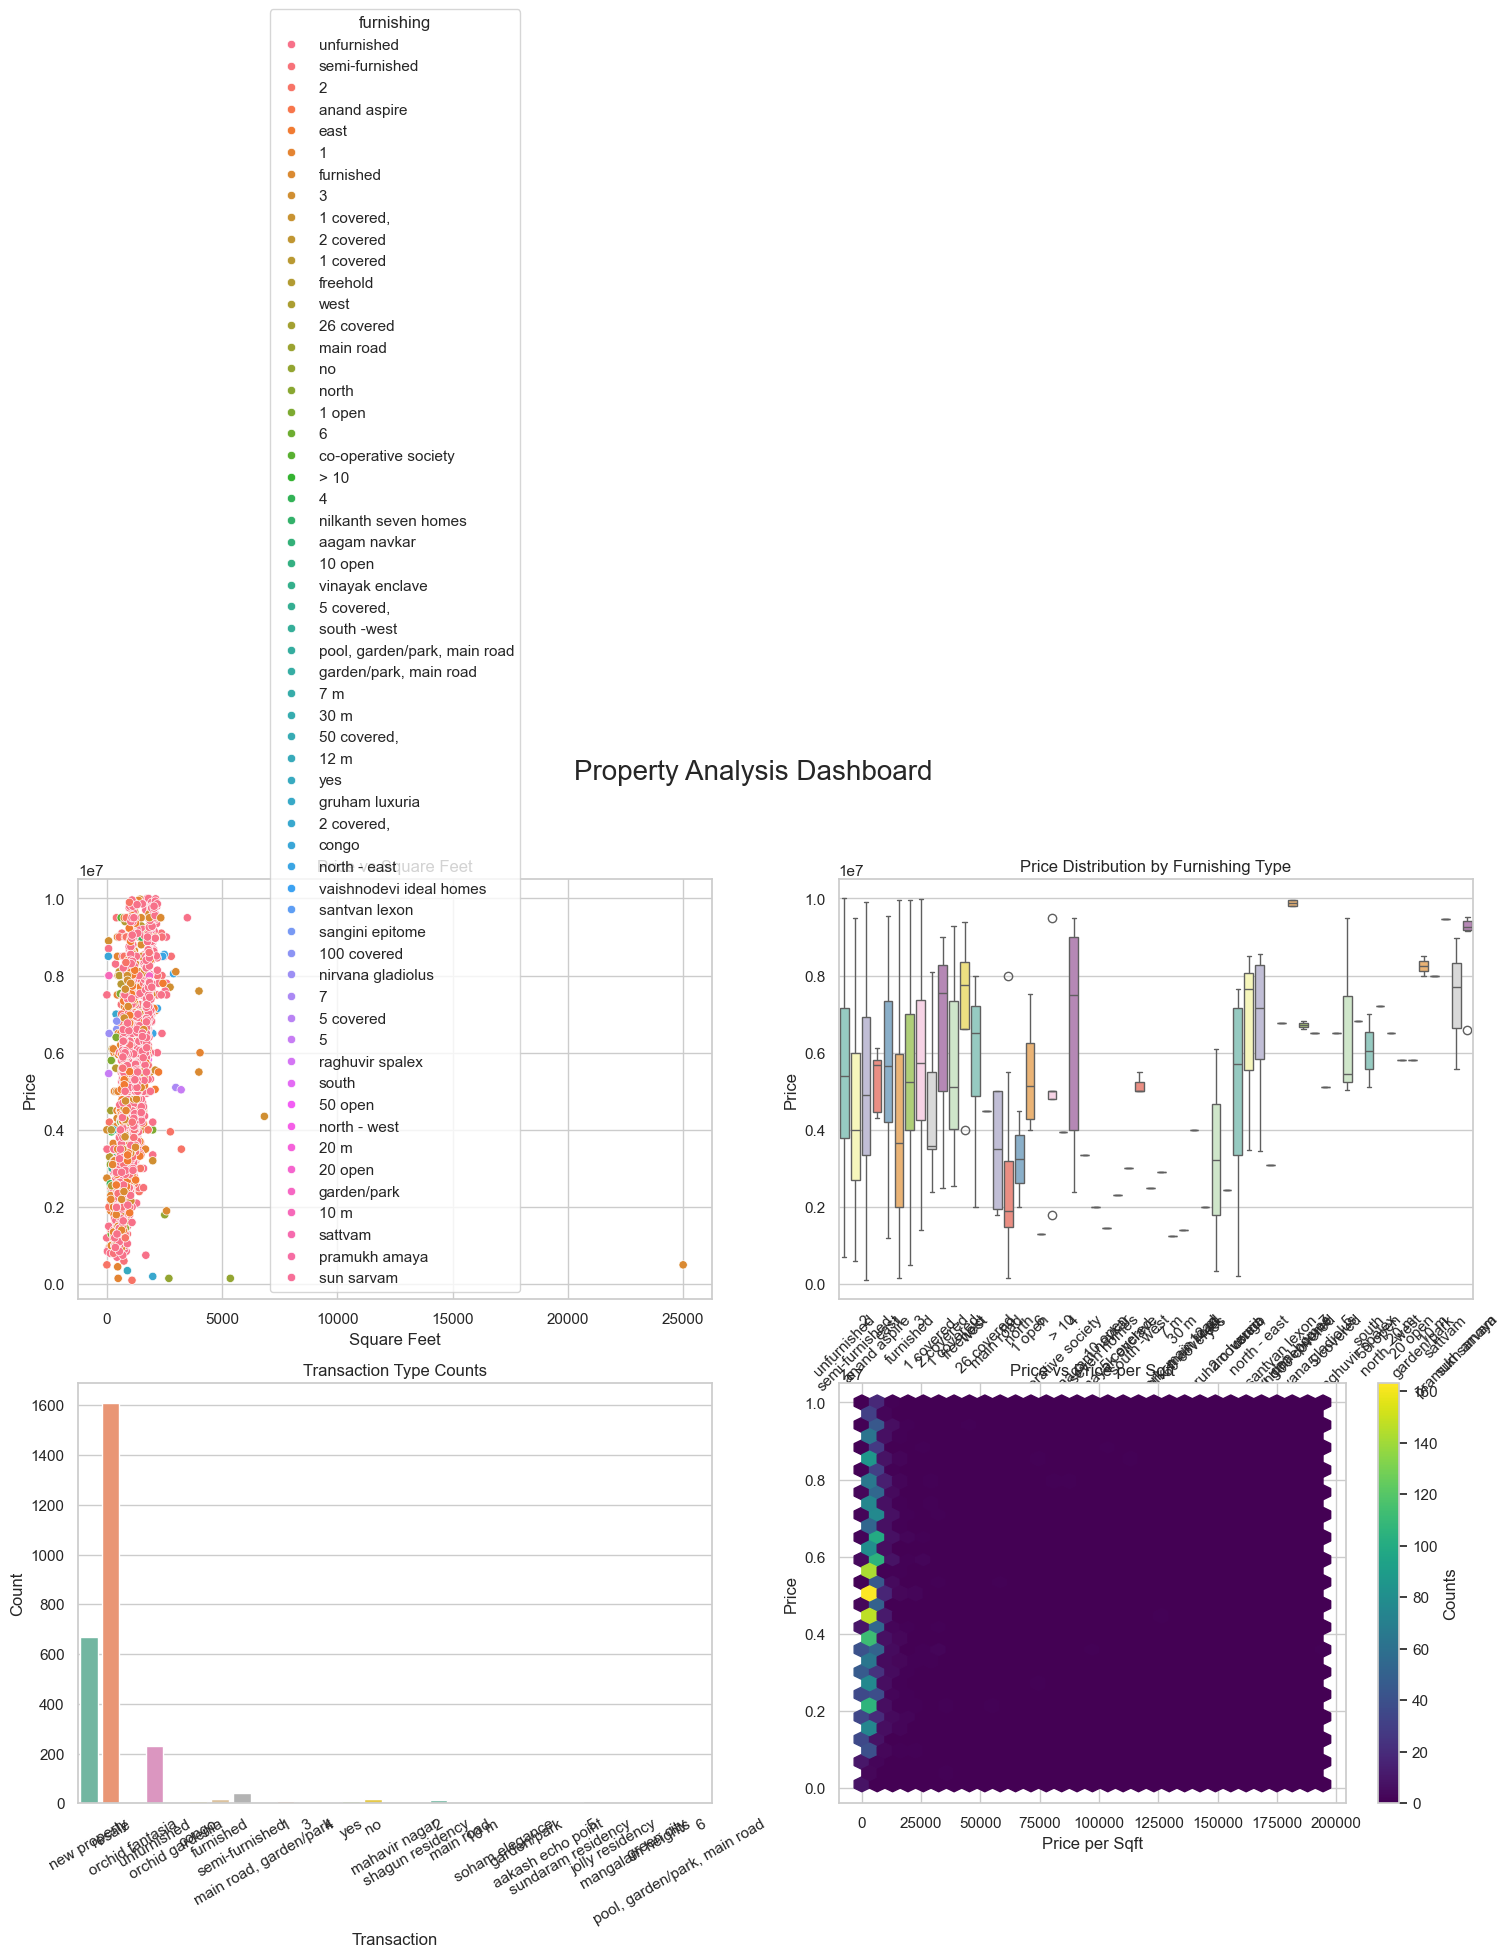

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# I will plot as many graphs as possible all at once 
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Property Analysis Dashboard', fontsize=20)

# Scatter Plot – Price vs Square Feet
sns.scatterplot(
    data=df,
    x='square_feet',
    y='price',
    hue='furnishing',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Price vs Square Feet')
axes[0, 0].set_xlabel('Square Feet')
axes[0, 0].set_ylabel('Price')

# Boxplot – Price by Furnishing
sns.boxplot(
    data=df,
    x='furnishing',
    y='price',
    hue='furnishing',
    palette='Set3',
    ax=axes[0, 1],
    legend=False
)
axes[0, 1].set_title('Price Distribution by Furnishing Type')
axes[0, 1].set_xlabel('Furnishing')
axes[0, 1].set_ylabel('Price')
axes[0, 1].tick_params(axis='x', rotation=45)

# Count Plot – Transaction Types
sns.countplot(
    data=df,
    x='transaction',
    hue='transaction',
    palette='Set2',
    ax=axes[1, 0],
    legend=False
)
axes[1, 0].set_title('Transaction Type Counts')
axes[1, 0].set_xlabel('Transaction')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=30)

# Hexbin – Price vs Price Per Sqft
hb = axes[1, 1].hexbin(
    df['price_per_sqft'],
    df['price'],
    gridsize=30,
    cmap='viridis'
)
axes[1, 1].set_title('Price vs Price per Sqft')
axes[1, 1].set_xlabel('Price per Sqft')
axes[1, 1].set_ylabel('Price')
cbar = fig.colorbar(hb, ax=axes[1, 1])
cbar.set_label('Counts')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

    

# Training 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features and target
X = df[['square_feet']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.0214


# Training plotedd 

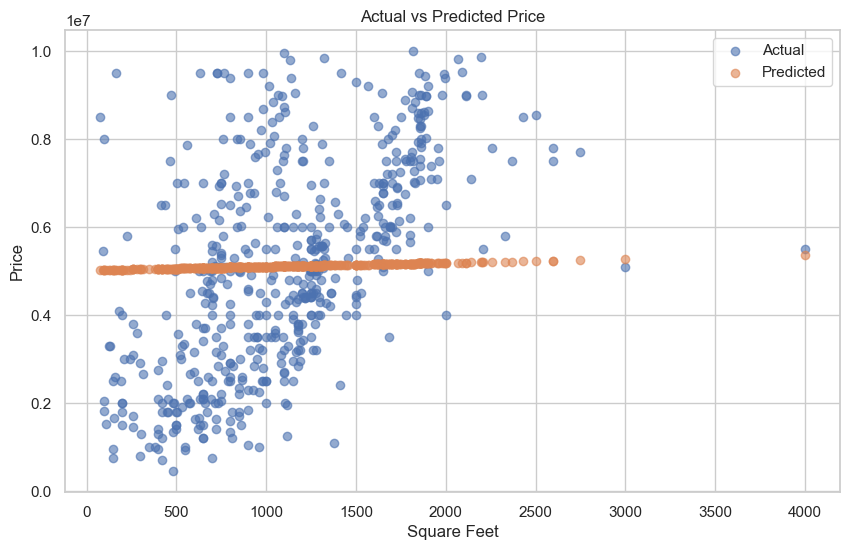

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', alpha=0.6)
plt.scatter(X_test, y_pred, label='Predicted', alpha=0.6)
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()
